In [35]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from numpy.polynomial.polynomial import polyfit
from numpy.polynomial.polynomial import polyval

from typing import List

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lombscargle.html
import scipy.signal as signal
# R.H.D. Townsend, “Fast calculation of the Lomb-Scargle periodogram using graphics processing units.”, The Astrophysical Journal Supplement Series, vol 191, pp. 247-253, 2010

# f = np.linspace(0.01, 10, nout)
# pgram = signal.lombscargle(x, y, f, normalize=True)
# plt.plot(f, pgram)

import sys
sys.path.insert(1, '/Users/joshuaprettyman/PycharmProjects/PhD_project/')
from tippingpoints import scaling_methods as sm
from thesisfigures.plot_helper import ThesisPlot



In [2]:
def plot_d180(t, z, t_out, y_out, name: str = 'gisp'):
    # create figure and axis objects with subplots()
    fig,ax1 = plt.subplots()
    # make a plot
    ax1.plot(t, z, color="grey", marker='o', linewidth=0.5, markersize=2)
    # set x-axis label
    ax1.set_xlabel("Age [kyr BP]",fontsize=12)
    # set y-axis label
    ax1.set_ylabel("δ18O H2O [‰ SMOW]",color="grey",fontsize=12)

    # twin object for two different y-axis on the sample plot
    ax2=ax1.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(t_out, y_out,color="blue")
    ax2.set_ylabel("PS indicator",color="blue",fontsize=12)
#     ax1.set_xlim([-22.88, -14.74])
#     ax2.set_xlim([-22.88, -14.74])
    plt.show()
    # save the plot as a file
    fig.savefig(f'{name}.png',
                format='png',
                dpi=200,
                bbox_inches='tight')

In [3]:
df1 = pd.read_csv('GISP_d180_22-11kyr.csv', sep="  ",  names=['age', 'd180'])
df2 = pd.read_csv('GRIP_d180_22-11kyr.csv', sep="  ",  names=['age', 'd180'])
df3 = pd.read_csv('NGRIP_d180_22-11kyr.csv', sep="  ",  names=['age', 'd180'])

<ipython-input-3-91f9e85d8da2>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df1 = pd.read_csv('GISP_d180_22-11kyr.csv', sep="  ",  names=['age', 'd180'])
<ipython-input-3-91f9e85d8da2>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df2 = pd.read_csv('GRIP_d180_22-11kyr.csv', sep="  ",  names=['age', 'd180'])
<ipython-input-3-91f9e85d8da2>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df3 = pd.read_csv('

In [4]:
df = df1.copy()
df['age'] = df['age'].apply(lambda x: x/1000)
df['GISP'] = df1.d180
df['GRIP'] = df2.d180
df['NGRIP'] = df3.d180
df.drop(columns='d180')

,age,GISP,GRIP,NGRIP
0,-22.88,-40.42,-40.62,-43.69
1,-22.86,-41.45,-40.53,-41.82
2,-22.84,-39.85,-41.52,-42.21
3,-22.82,-40.57,-41.09,-41.26
4,-22.80,-41.11,-40.97,-42.56
...,...,...,...,...
553,-11.82,-40.84,-41.34,-40.45
554,-11.80,-39.71,-40.33,-39.87
555,-11.78,-38.51,-39.69,-40.55
556,-11.76,-39.43,-39.40,-40.85


In [5]:
t = np.array(df.age)
z1 = np.array(df.GISP)
# z2 = np.array(df.GRIP)
# z3 = np.array(df.NGRIP)

In [6]:
help(sm.pse_sliding)

Help on function pse_sliding in module tippingpoints.scaling_methods:

pse_sliding(t: numpy.ndarray, z: numpy.ndarray, window_size: float = 1.0, binning: bool = True, window_limits: (<class 'float'>, <class 'float'>) = (-2, -1), increment: Union[float, NoneType] = None, pse_method: str = 'Regular', where_in_window: str = 'end')
    For a time series :math:`z(t)` we select a slice of the data defined by
    a sliding window e.g. for ``window_size=200`` the first data slice would
    be ``z[0:200]``.
    
    We then measure the power spectrum scaling exponent of this slice and progress
    the window by an increment, e.g. for ``increment=1`` the second data slice
    would be ``z[1:201]``.
    
    This function returns ``y_out``: the series of these ACF values, and
    ``t_out``, the corresponding time variable.
    
    :param where_in_window:
    :param pse_method:
    :param window_limits:
    :param t: time variable
    :param z: dependent variable
    :param window_size: length of

150.0


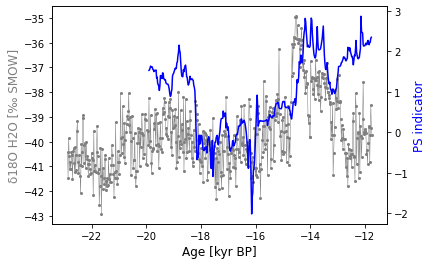

In [21]:
ws = 3
wiw = 'end'
binning = True
window_limits = [-2, -1]

t1_out, y1_out, piw1 = sm.pse_sliding(t, z1, window_size=ws, binning=binning, where_in_window=wiw)
# t2_out, y2_out, piw2 = sm.pse_sliding(t, z2, window_size=ws, binning=binning, where_in_window=wiw)
# t3_out, y3_out, piw3 = sm.pse_sliding(t, z3, window_size=ws, binning=binning, where_in_window=wiw)

print(np.mean(piw1))
plot_d180(t, z1, t1_out, y1_out)

In [8]:
# plot_d180(t, z2, t2_out, y2_out)

In [9]:
# plot_d180(t, z3, t3_out, y3_out)

In [10]:
# Take the mean of all three PS indicators

# mean_pse = np.array([y1_out, y2_out, y3_out]).mean(axis=0)
# plot_d180(t, z1, t1_out, mean_pse, "gisp_mean")

Drawing figure with 1 subplots with layout [[0]]...
Figure properties:
 - figure size (w,h) : (10.0, 5.15)
 - number of plots   : 1
 - subplot pattern   : [[0]]
 - subplot layout    : [[0]]
 - plot positions:
     0:  [0.07999999999999999, 0.13592233009708743, 0.85, 0.8252427184466019]
Saving figure as ../../Desktop/fig09.eps...


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Showing figure...


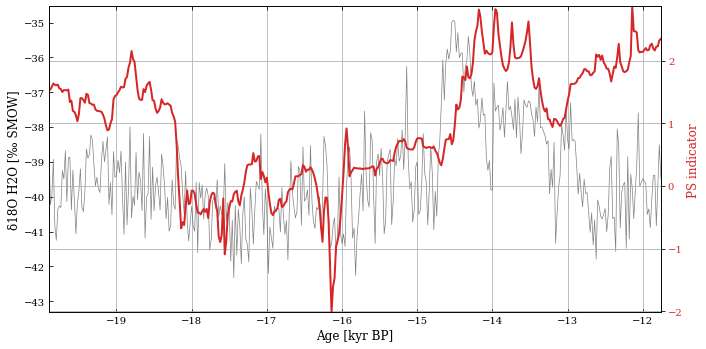

In [34]:
p = ThesisPlot(figure_number='2.9', pattern=[[0]], vertical_gap_size='none', right_tick_labels=True)
p.plot(t, z1, line_style='thin', axes_no=0)

p.axes_labels(xlabel=r"Age [kyr BP]", ylabel=r"δ18O H2O [‰ SMOW]", axes_no=0)

p.print_figure_properties()

p.ax[0].set_xlim([t1_out[0], t1_out[-1]])
p.ax[0].grid(b=False, axis='y')

ax_twin = p.ax[0].twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax_twin.set_ylabel('PS indicator', color=color)  # we already handled the x-label with ax1
ax_twin.plot(t1_out, y1_out, color=color, lw=2)
ax_twin.tick_params(axis='y', labelcolor=color)
ax_twin.set_ylim([min(y1_out), max(y1_out)])

p.save_figure('eps')
p.show()